In [1]:
from applications.denoiser_environment import DenoiserEnvironment

In [2]:
import torch

In [3]:
PATH_BASE = "/home/amedvedev/fprojects/python/denoising"
NAME_DATASET = "gcg18"
width, height = 30, 30
env = DenoiserEnvironment(name_model="model_18", name_dataset=NAME_DATASET, path_base=PATH_BASE)
env.device = torch.device("cuda:0")

In [16]:
from datageneration.generators import GenPolyDataset
from datageneration import paramsgens

generate_settings = [("train", 1), ("val", 0)]

for (data_category, count) in generate_settings:
    env.generate_data(NAME_DATASET, data_category, n=count, width=width, height=height,
                      cell_size=paramsgens.GenCellSizeInSet([1, 2]),
                      pct_noise=paramsgens.GenPctUniformNoiseRange(0.6, 0.7),
                      k0=paramsgens.GenK0InRange(min_val=-100, max_val=100),
                      csv=False, txt=True, png=True,
                      generator_class=GenPolyDataset,
                      )

# pct_noise=0.1, k0=55.0,

Generating dataset gcg18/train...
Progress: |██████████████████████████████| 100.0% Complete | 

Generating dataset gcg18/val...



In [4]:
import models
env.init_model(models.ImageAutoencoder)

/home/amedvedev/fprojects/python/denoising/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/amedvedev/fprojects/python/denoising/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/home/amedvedev/fprojects/python/denoising/venv/lib/python3.10/site-packages/torch/overrides.py:110: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  torch.has_cuda,
/home/amedvedev/fprojects/python/denoising/venv/lib/python3.10/site-packages/torch/overrides.py:111: 

New model created.


In [18]:
import models
env.model = models.UnetAutoencoder.UNetAuto(1, 1, 1024).to(env.device)

In [19]:
env.model.eval()
x = torch.randn(1, 1, 64, 64, device=env.device)
print(env.model(x).size())

torch.Size([1, 1, 64, 64])


In [20]:
env.model = torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 'unet',
    in_channels=1, out_channels=1, init_features=32, pretrained=False).to(env.device)

Using cache found in /home/amedvedev/.cache/torch/hub/mateuszbuda_brain-segmentation-pytorch_master


In [21]:
env.load_model(model_type="pt")

In [22]:
from common.fstream import read_tensor, read_matrix
env.load_data(width, height, batch_size=4, read_tensor_x=read_tensor, read_tensor_y=read_tensor)

In [5]:
from common.fstream import read_tensor, read_matrix
env.load_equal_data(width, height, batch_size=4, read_tensor_x=read_tensor, read_tensor_y=read_matrix)

In [24]:
scores_before, scores = env.score(show=True)


KeyboardInterrupt



In [6]:
env.train(10, step_saving=True, step_plotting=False,
          optimizer=torch.optim.Adam(env.model.parameters(), lr=0.001), criterion=torch.nn.L1Loss())

/home/amedvedev/fprojects/python/denoising/venv/lib/python3.10/site-packages/torch/_tensor.py:836: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


Training progress: |██████████████████████████████████████████████████| 100.0% Complete | 

Validating progress: |██████████████████████████████████████████████████| 100.0% Complete | 

Epoch: 1 	Training Loss: 3.365298 	Validating Loss: 2.671733 	Time: 0.53 m


Training progress: |██████████████████████████████████████████████████| 100.0% Complete | 

Validating progress: |██████████████████████████████████████████████████| 100.0% Complete | 

Epoch: 2 	Training Loss: 2.636048 	Validating Loss: 2.451643 	Time: 0.52 m
Model saved successfully at /home/amedvedev/fprojects/python/denoising/assets/pt/model_18.pt.


Training progress: |██████████████████████████████████████████████████| 100.0% Complete | 

Validating progress: |██████████████████████████████████████████████████| 100.0% Complete | 

Epoch: 3 	Training Loss: 2.460741 	Validating Loss: 2.390498 	Time: 0.53 m
Model saved successfully at /home/amedvedev/fprojects/python/denoising/assets/pt/model_18.pt.


Training progress: |███

In [ ]:
env.show_metrics(n_last=40)

In [ ]:
scores_before, scores = env.score(show=True)

In [ ]:
env.save(pth=False, onnx=True)

In [ ]:
torch.save(env.model, "/home/amedvedev/fprojects/python/denoising/assets/pt/model.pt")

In [ ]:
env.test_on_dataset(include_train=False, include_test=True, cmap="jet")

Show example №0


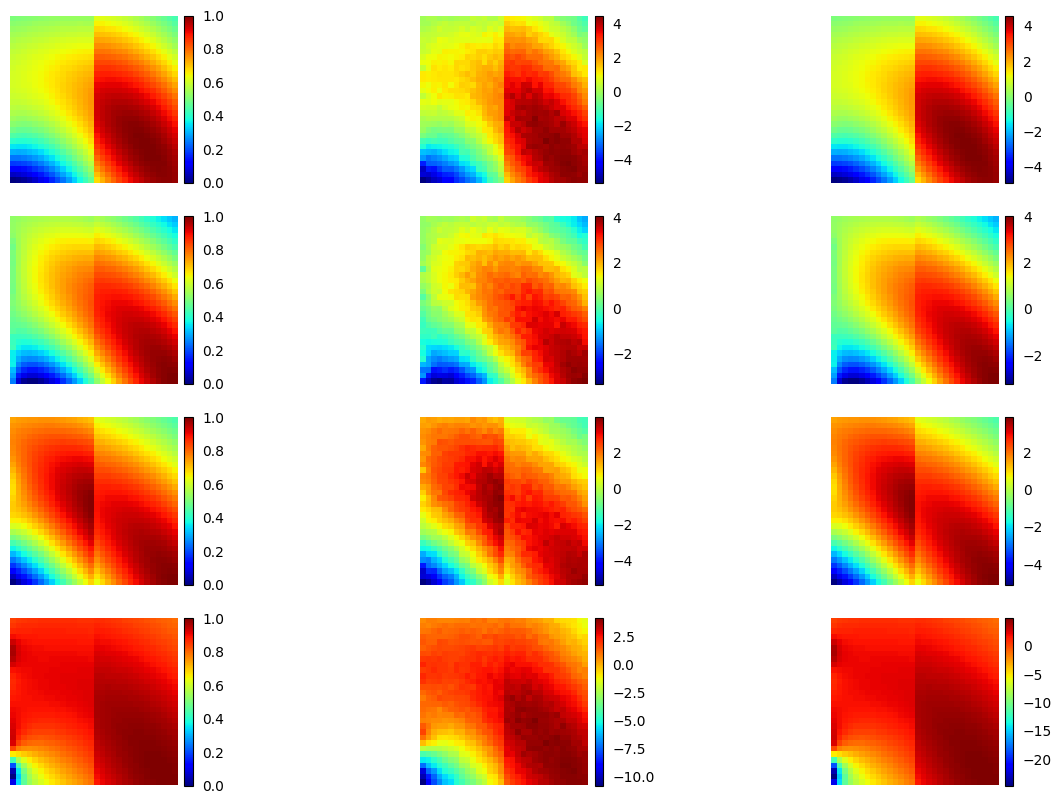

In [12]:
env.show_single(concrete=None, op_count=1, figsize=(15, 10), cmap="jet")

In [ ]:
import gc
gc.collect()


In [ ]:

import torch
env.model.cpu()
del env.model

torch.cuda.empty_cache()